<a href="https://colab.research.google.com/github/Eder-Oliver/analytics_project/blob/main/PROJETO_ANALYTICS_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####O objetivo geral deste trabalho é, identificar tendências e padrões por meio da segmentação e classificação dos municípios do estado de Minas Gerais, com base nos indicadores como: População total, Mortalidade infantil, Expectativa de vida, Renda per capta, IDHM, IDHM Educação, Expectativa de anos de estudo, Índice de Gini.

Em especial, busca-se estimar: a qualidade de vida da população em relação a renda, educação, expectativa de vida e municípios com maior renda per capita.

A expectativa de vida está diretamente ligada às condições sociais, como educação e renda.

Por sua vez, a renda per capita, é um fator determinante para o desenvolvimento dos municípios e a população local, é um dos pilares do IDHM “Índice de desenvolvimento humano municipal”, juntamente com a Educação, que compõe IDHM Educacional, e ambos são diretamente proporcionais à uma melhor qualidade de vida para população.

Fonte de obtenção da base de dados:
https://www.ipea.gov.br/ipeageo/bases.html
https://www.ipea.gov.br/ipeageo/arquivos/bases/MG_Mun97_region.xls

#Bibliotecas a serem utilizadas

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.figure_factory as pff
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
!pip install pycaret
from pycaret.classification import *

#Carregando os dados

In [2]:
df = pd.read_excel('/content/drive/MyDrive/FIA LABDATA/ANALYTICS/Dataset/TCC/IDH MG 2010.xlsx')

In [3]:
df.head()

,ANO,Nome da Unidade da Federação,Município,Esperança de vida ao nascer,Taxa de fecundidade total,Mortalidade infantil,Mortalidade até 5 anos de idade,Razão de dependência,Probabilidade de sobrevivência até 40 anos,Probabilidade de sobrevivência até 60 anos,...,População de 15 a 17 anos.1,População de 18 anos ou mais.1,População total em domicílios particulares permanentes,"População total em domicílios particulares permanentes, exceto com renda nula",Subíndice de escolaridade - IDHM Educação,Subíndice de frequência escolar - IDHM Educação,IDHM,IDHM Educação,IDHM Longevidade,IDHM Renda
0,2010,Minas Gerais,Abadia dos Dourados,75.35,1.97,14.8,17.22,42.76,93.80,83.02,...,302,5036,6658,6603,0.394,0.673,0.689,0.563,0.839,0.693
1,2010,Minas Gerais,Abaeté,75.90,2.33,14.0,16.27,45.23,94.13,83.81,...,1178,16743,22456,22450,0.363,0.689,0.698,0.556,0.848,0.720
2,2010,Minas Gerais,Abre Campo,74.36,1.87,16.3,18.99,49.53,93.19,81.56,...,772,9430,13114,12804,0.317,0.676,0.654,0.525,0.823,0.646
3,2010,Minas Gerais,Acaiaca,74.36,1.91,16.3,18.99,53.18,93.19,81.56,...,228,2775,3919,3895,0.342,0.603,0.630,0.499,0.823,0.610
4,2010,Minas Gerais,Açucena,75.66,2.11,14.3,16.67,60.26,93.99,83.47,...,624,7029,10218,9904,0.271,0.582,0.610,0.451,0.844,0.595


In [4]:
df.sample(10)

,ANO,Nome da Unidade da Federação,Município,Esperança de vida ao nascer,Taxa de fecundidade total,Mortalidade infantil,Mortalidade até 5 anos de idade,Razão de dependência,Probabilidade de sobrevivência até 40 anos,Probabilidade de sobrevivência até 60 anos,...,População de 15 a 17 anos.1,População de 18 anos ou mais.1,População total em domicílios particulares permanentes,"População total em domicílios particulares permanentes, exceto com renda nula",Subíndice de escolaridade - IDHM Educação,Subíndice de frequência escolar - IDHM Educação,IDHM,IDHM Educação,IDHM Longevidade,IDHM Renda
740,2010,Minas Gerais,São José da Safira,70.91,3.13,22.4,26.07,57.52,90.83,76.18,...,256,2610,4075,4045,0.288,0.529,0.583,0.432,0.765,0.600
789,2010,Minas Gerais,Sete Lagoas,75.37,1.66,14.8,17.18,39.59,93.81,83.05,...,11413,156484,213087,213046,0.590,0.770,0.760,0.705,0.840,0.742
836,2010,Minas Gerais,Varzelândia,73.37,2.55,18.0,20.88,62.84,92.55,80.06,...,1405,11801,19056,18592,0.282,0.620,0.594,0.477,0.806,0.546
755,2010,Minas Gerais,São Sebastião da Vargem Alegre,74.64,1.95,15.9,18.48,43.78,93.37,81.97,...,170,2029,2797,2727,0.333,0.711,0.660,0.552,0.827,0.631
553,2010,Minas Gerais,Paraopeba,72.55,2.05,19.4,22.54,43.62,92.00,78.79,...,1334,15730,22494,22470,0.478,0.715,0.694,0.625,0.793,0.674
505,2010,Minas Gerais,Munhoz,74.25,1.89,16.5,19.20,44.14,93.12,81.40,...,324,4460,6227,6062,0.327,0.656,0.647,0.520,0.821,0.634
273,2010,Minas Gerais,Estiva,75.90,1.78,14.0,16.26,42.89,94.13,83.82,...,549,8067,10845,10840,0.343,0.741,0.691,0.573,0.848,0.679
286,2010,Minas Gerais,Fernandes Tourinho,73.43,1.76,17.9,20.78,53.03,92.59,80.14,...,181,2145,3027,2982,0.353,0.686,0.646,0.550,0.807,0.608
231,2010,Minas Gerais,Curvelo,76.05,1.85,13.8,16.01,46.41,94.22,84.04,...,3863,53314,73637,73493,0.480,0.700,0.713,0.617,0.851,0.689
216,2010,Minas Gerais,Córrego Danta,75.61,1.98,14.4,16.77,48.53,93.96,83.39,...,148,2570,3362,3341,0.398,0.691,0.692,0.575,0.844,0.683


In [5]:
df.columns

Index(['ANO', 'Nome da Unidade da Federação', 'Município',
       'Esperança de vida ao nascer', 'Taxa de fecundidade total',
       'Mortalidade infantil', 'Mortalidade até 5 anos de idade',
       'Razão de dependência', 'Probabilidade de sobrevivência até 40 anos',
       'Probabilidade de sobrevivência até 60 anos',
       ...
       'População de 15 a 17 anos.1', 'População de 18 anos ou mais.1',
       'População total em domicílios particulares permanentes',
       'População total em domicílios particulares permanentes, exceto com renda nula',
       'Subíndice de escolaridade - IDHM Educação',
       'Subíndice de frequência escolar - IDHM Educação', 'IDHM',
       'IDHM Educação', 'IDHM Longevidade', 'IDHM Renda'],
      dtype='object', length=235)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Columns: 235 entries, ANO to IDHM Renda
dtypes: float64(159), int64(74), object(2)
memory usage: 1.5+ MB


#Verificando o tamanho do DataFrame

In [7]:
df.shape

(853, 235)

In [8]:
df.dtypes

,0
ANO,int64
Nome da Unidade da Federação,object
Município,object
Esperança de vida ao nascer,float64
Taxa de fecundidade total,float64
...,...
Subíndice de frequência escolar - IDHM Educação,float64
IDHM,float64
IDHM Educação,float64
IDHM Longevidade,float64


#Renomeando as colunas que serão utilizadas para análise

In [9]:
df = df.rename(columns={'Nome da Unidade da Federação' : 'Estado',
                        'Esperança de vida ao nascer' : 'Expectativa_de_vida',
                        'Mortalidade infantil' : 'Mortalidade_infantil',
                        'IDHM Renda' : 'Renda',
                        'IDHM Educação' : 'IDHM_Educacao',
                        'População total' : 'Populacao_total',
                        'População residente feminina' : 'Populacao_resid_fem',
                        'População residente masculina' : 'Populacao_resid_masc',
                        'Renda per capita' : 'Renda_per_capita',
                        'Índice de Gini' : 'Indice_Gini',
                        'Expectativa de anos de estudo' : 'Expectativa_anos_estudo'
                        })


#Definindo DataFrame Atual

In [10]:
df1 = df[['Estado',
               'Município',
               'Mortalidade_infantil',
               'Expectativa_de_vida',
               'Expectativa_anos_estudo',
               'IDHM',
               'IDHM_Educacao',
               'Populacao_total',
               'Renda_per_capita',
               'Indice_Gini']]

#Carregando DataFrame Atual

In [11]:
df1

,Estado,Município,Mortalidade_infantil,Expectativa_de_vida,Expectativa_anos_estudo,IDHM,IDHM_Educacao,Populacao_total,Renda_per_capita,Indice_Gini
0,Minas Gerais,Abadia dos Dourados,14.8,75.35,8.68,0.689,0.563,6704,596.18,0.47
1,Minas Gerais,Abaeté,14.0,75.90,9.19,0.698,0.556,22690,707.24,0.54
2,Minas Gerais,Abre Campo,16.3,74.36,9.34,0.654,0.525,13311,444.32,0.52
3,Minas Gerais,Acaiaca,16.3,74.36,10.09,0.630,0.499,3920,357.03,0.48
4,Minas Gerais,Açucena,14.3,75.66,8.49,0.610,0.451,10276,325.42,0.48
...,...,...,...,...,...,...,...,...,...,...
848,Minas Gerais,Virginópolis,15.6,74.86,9.04,0.675,0.580,10572,423.01,0.49
849,Minas Gerais,Virgolândia,19.1,72.71,8.93,0.620,0.497,5658,339.03,0.51
850,Minas Gerais,Visconde do Rio Branco,13.9,75.97,8.84,0.709,0.591,37942,658.96,0.49
851,Minas Gerais,Volta Grande,14.6,75.45,8.01,0.669,0.531,5070,515.46,0.51


In [12]:
df1.describe() #Descrição do DataFrame utilizado para análise

,Mortalidade_infantil,Expectativa_de_vida,Expectativa_anos_estudo,IDHM,IDHM_Educacao,Populacao_total,Renda_per_capita,Indice_Gini
count,853.000000,853.000000,853.000000,853.000000,853.000000,8.530000e+02,853.000000,853.000000
mean,16.377479,74.424771,9.092403,0.667878,0.556828,2.297460e+04,490.599742,0.473283
std,2.920400,1.790176,0.759859,0.049637,0.069444,9.375154e+04,173.077762,0.053103
min,10.350000,68.370000,6.030000,0.529000,0.339000,8.150000e+02,181.770000,0.320000
25%,14.200000,73.100000,8.620000,0.633000,0.513000,4.689000e+03,359.930000,0.440000
50%,16.200000,74.410000,9.150000,0.670000,0.558000,8.003000e+03,475.230000,0.470000
75%,18.400000,75.780000,9.630000,0.702000,0.601000,1.716100e+04,592.950000,0.500000
max,27.800000,78.150000,11.040000,0.813000,0.744000,2.375151e+06,1731.840000,0.780000


In [13]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mortalidade_infantil,853.0,16.377479,2.920400,10.350,14.200,16.200,18.400,27.800
Expectativa_de_vida,853.0,74.424771,1.790176,68.370,73.100,74.410,75.780,78.150
Expectativa_anos_estudo,853.0,9.092403,0.759859,6.030,8.620,9.150,9.630,11.040
IDHM,853.0,0.667878,0.049637,0.529,0.633,0.670,0.702,0.813
IDHM_Educacao,853.0,0.556828,0.069444,0.339,0.513,0.558,0.601,0.744
Populacao_total,853.0,22974.595545,93751.544187,815.000,4689.000,8003.000,17161.000,2375151.000
Renda_per_capita,853.0,490.599742,173.077762,181.770,359.930,475.230,592.950,1731.840
Indice_Gini,853.0,0.473283,0.053103,0.320,0.440,0.470,0.500,0.780


In [14]:
df1_numeric = df1.select_dtypes(include='number')
df1['Estado'] = df1['Estado'].astype('category')
df1['Município'] = df1['Município'].astype('category')

#Correlacionando as informações do df_atual

In [15]:
df1_numeric.corr(method='pearson') #Correlação entre as colunas do DataFrame

,Mortalidade_infantil,Expectativa_de_vida,Expectativa_anos_estudo,IDHM,IDHM_Educacao,Populacao_total,Renda_per_capita,Indice_Gini
Mortalidade_infantil,1.000000,-0.996298,-0.180818,-0.785879,-0.582521,-0.148607,-0.729969,0.015795
Expectativa_de_vida,-0.996298,1.000000,0.180634,0.792128,0.587111,0.150767,0.745473,-0.004199
Expectativa_anos_estudo,-0.180818,0.180634,1.000000,0.400432,0.498120,0.103714,0.220762,-0.098762
IDHM,-0.785879,0.792128,0.400432,1.000000,0.929531,0.277396,0.877000,-0.033498
IDHM_Educacao,-0.582521,0.587111,0.498120,0.929531,1.000000,0.273819,0.687762,-0.098744
Populacao_total,-0.148607,0.150767,0.103714,0.277396,0.273819,1.000000,0.367569,0.139068
Renda_per_capita,-0.729969,0.745473,0.220762,0.877000,0.687762,0.367569,1.000000,0.165814
Indice_Gini,0.015795,-0.004199,-0.098762,-0.033498,-0.098744,0.139068,0.165814,1.000000


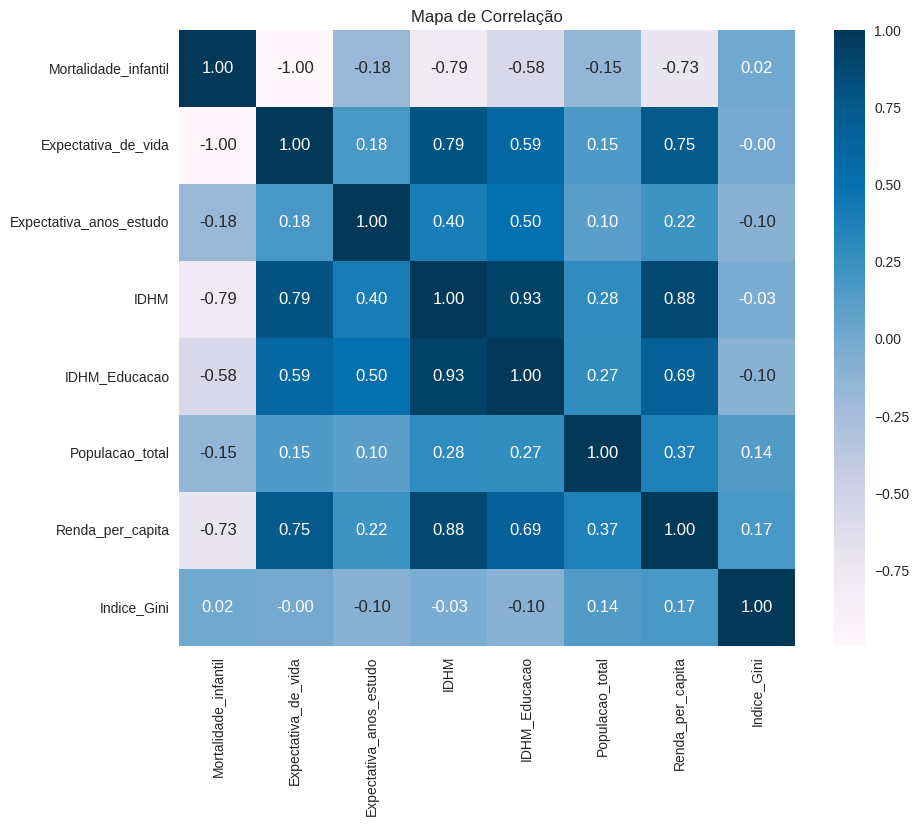

In [16]:
# Análise Exploratória
correlaçao = df1_numeric.corr(method='pearson') # Calculate and store correlation

plt.figure(figsize=(10,8))
sns.heatmap(correlaçao, annot=True, cbar=True, square=True, fmt=".2f", cmap=('PuBu'))
plt.title('Mapa de Correlação')
plt.show()

####Correlações Fortes e Positivas:

IDHM e seus componentes: O IDHM apresenta correlações fortes e positivas com seus componentes: IDHM_Educacao (0.93), Renda_per_capita (0.88) e Expectativa_de_vida (0.79). Isso indica que melhorias em educação, renda e expectativa de vida estão diretamente ligadas a um IDHM mais alto.
Expectativa de vida e Renda per capita: A correlação de 0.75 sugere que locais com maior renda per capita tendem a ter uma população com maior expectativa de vida.
IDHM e Renda per capita: A correlação de 0.88 indica uma forte relação entre o desenvolvimento humano e a renda da população.
IDHM_Educacao e IDHM: A correlação de 0.93 demonstra que o componente educação tem um peso significativo no cálculo do IDHM.

Correlações Fortes e Negativas:

Mortalidade Infantil e Expectativa de vida: A correlação de -1.00 indica uma relação inversa perfeita. Onde a mortalidade infantil é alta, a expectativa de vida tende a ser baixa e vice-versa.
Mortalidade Infantil e IDHM: A correlação de -0.79 sugere que locais com alta mortalidade infantil tendem a ter um IDHM mais baixo.
Mortalidade Infantil e Renda per capita: A correlação de -0.73 indica que a mortalidade infantil tende a ser menor em locais com maior renda per capita.


População Total: Apresenta correlações fracas com as demais variáveis, indicando que o tamanho da população não tem um impacto determinante nos outros indicadores.
Índice Gini: O Índice Gini, que mede a desigualdade de renda, apresenta correlações muito baixas com as outras variáveis. Isso sugere que a desigualdade de renda não está fortemente associada aos outros indicadores sociais e econômicos neste conjunto de dados.
Em resumo: O gráfico revela que o desenvolvimento humano (IDHM) está intimamente ligado à educação, renda e expectativa de vida. A mortalidade infantil é um fator que impacta negativamente o IDHM e está associada a baixos níveis de renda e expectativa de vida.

#Média da renda per capita relacionada à expectativa de vida, educação e Indice de Gini

In [17]:
top_15_municipios = df.sort_values(by='Município', ascending=False).head(15)

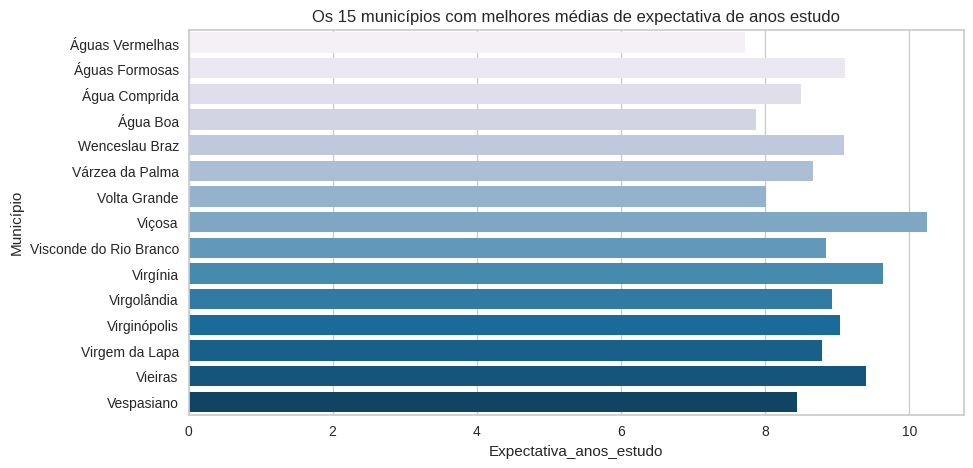

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_15_municipios, y='Município', x='Expectativa_anos_estudo', hue='Município', palette=('PuBu'))
plt.xlabel('Expectativa_anos_estudo')
plt.ylabel('Município')
plt.title('Os 15 municípios com melhores médias de expectativa de anos estudo')
plt.xticks(rotation=0)
plt.show()

###O gráfico mostra os 15 municípios com as melhores médias de expectativa de anos de estudo, destacando a diferença na qualidade e na duração da educação oferecida em diferentes localidades.

<Figure size 1200x800 with 0 Axes>

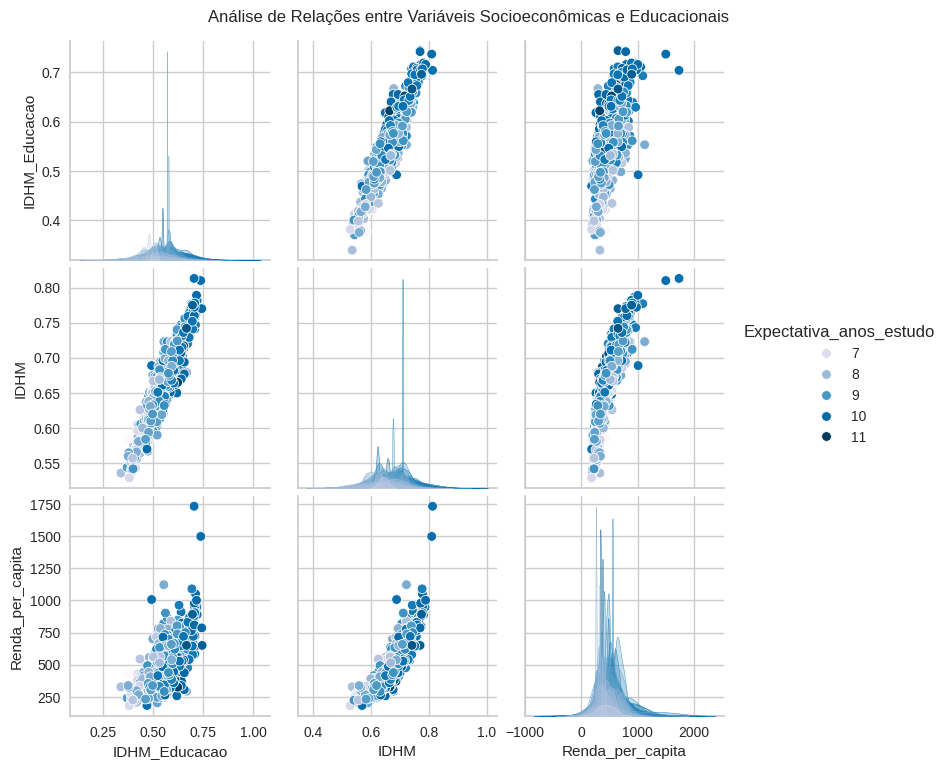

In [19]:
#Mapa de correlação
plt.figure(figsize=(12,8))

sns.pairplot(df1[['Município','Expectativa_anos_estudo', 'IDHM_Educacao', 'IDHM', 'Renda_per_capita' ]], hue='Expectativa_anos_estudo', palette=('PuBu'));
plt.suptitle('Análise de Relações entre Variáveis Socioeconômicas e Educacionais', fontsize=12, y=1.02)

plt.show()

#Expectativa de vida por Renda per Capita

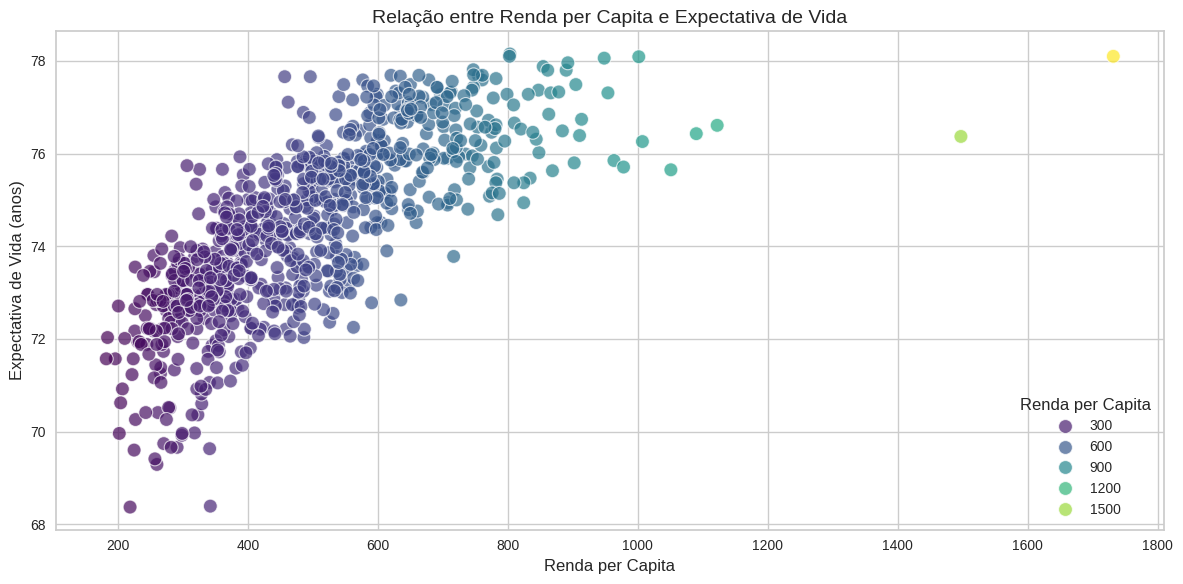

In [20]:
plt.figure(figsize=(12,6))

sns.scatterplot(x='Renda_per_capita', y='Expectativa_de_vida', data=df1,
                hue='Renda_per_capita', palette='viridis', s=100, alpha=0.7)

plt.title('Relação entre Renda per Capita e Expectativa de Vida', fontsize=14)

plt.xlabel('Renda per Capita', fontsize=12)
plt.ylabel('Expectativa de Vida (anos)', fontsize=12)

plt.legend(title='Renda per Capita')

plt.tight_layout()
plt.show()

###O gráfico de dispersão apresentado ilustra a relação entre a Renda per Capita e a Expectativa de Vida (em anos). Cada ponto no gráfico representa um conjunto de dados que inclui a renda per capita e a expectativa de vida.

Principais Observações:
Correlação Positiva: Há uma clara tendência de correlação positiva, onde, à medida que a renda per capita aumenta, a expectativa de vida também tende a aumentar. Isso é indicado pela distribuição ascendente dos pontos.

Distribuição dos Dados:

A maioria dos pontos está concentrada entre a faixa de renda per capita de 200,00 a 900,00 Reais, com expectativa de vida variando entre 70 e 78 anos.
À medida que a renda per capita ultrapassa os R$1.200, há menos pontos, mas a expectativa de vida nesses casos também é maior.

O gráfico, portanto, sugere que, em geral, uma maior renda per capita está associada a uma maior expectativa de vida.

# Quinze maiores rendas per capita por município de Minas Gerais

In [21]:
top_15_rendas = df.sort_values(by='Renda_per_capita', ascending=False).head(15)

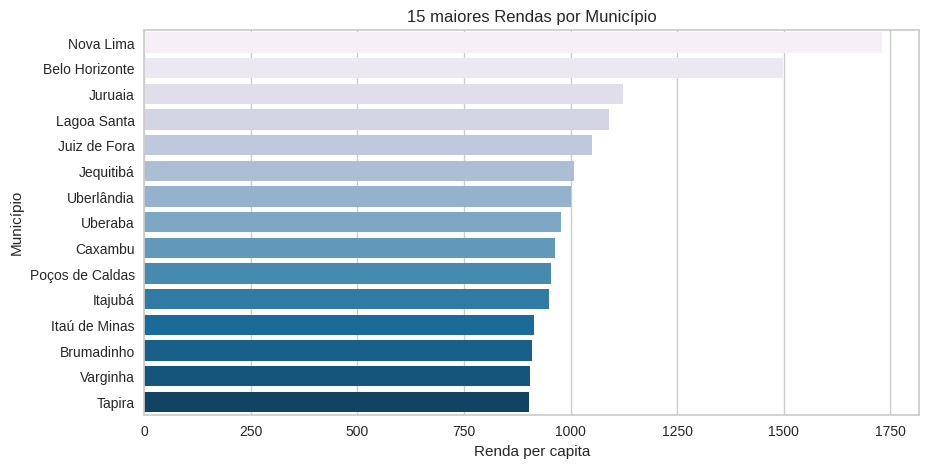

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_15_rendas, y='Município', x='Renda_per_capita', hue='Município',  palette=('PuBu'))
plt.xlabel('Renda per capita')
plt.ylabel('Município')
plt.title('15 maiores Rendas por Município')
plt.xticks(rotation=0)
plt.show()

###O gráfico representa as 15 maiores rendas per capita por município em Minas Gerais.
Nova Lima e Belo Horizonte se destacam entre os demais municípios listados, sendo que os outros municípios estão em um agrupamento com renda per capita entre 750,00 e 1000,00 Reais.

#População Minas Gerais 2010

In [23]:
#Somando a população total de Minas Gerais.
df.Populacao_total.sum()

19597330

#Mapa informativo de Minas Gerais


#Instalação Biblioteca Folium. Fonte: https://pypi.org/project/folium/
#A bibliteca folium é baseada em Python, permitindo  a criação de mapas interativos, onde podemos  inserir diversas informações como (mapa de calor, marcações, quantidade populacional, dimensão territorial) para uma melhor visualização dos dados analisados e aplicados.

In [24]:
#Instalando a biblioteca folium.
!pip install folium

In [25]:
#Impotando biblioteca folium
import folium

In [26]:
#Criando parâmetros Mapa Minas Gerais
Mapa_MG = folium.Map(
    location   = [-23.5 ,-40],
    tiles      = "OpenStreetmap" ,
    zoom_start = 6.2,
    )

In [27]:
 #Plotando Mapa de Minas Gerais com a população do ano de 2010
 folium.Marker(
      [-19.912998, -43.940933], #Localização Geográfica MG (lat , lon)
      popup='<i>Belo Horizonte</i>',
      tooltip='População Total de Minas Gerais no ano de 2010 "19597330"',
      icon=folium.Icon(color='red')
      ).add_to(Mapa_MG)


In [28]:
Mapa_MG

#Arquivo para cálculo Densidade demografica.
#Fonte: https://www.ibge.gov.br/cidades-e-estados/mg/

In [29]:
#Carregamento do arquivo
df2 = pd.read_excel('/content/drive/MyDrive/FIA LABDATA/ANALYTICS/Dataset/TCC/DENSIDADE DEMOGRAFICA.xlsx')
df2.head()

,Município,Área_Territorial,Populacao_residente,Densidade_demografica,IDHM_2010
0,Abadia dos Dourados,880.461,6272.0,7.12,0.689
1,Abaeté,1817.067,22675.0,12.48,0.698
2,Abre Campo,470.551,13927.0,29.60,0.654
3,Acaiaca,101.886,3909.0,38.37,0.630
4,Açucena,815.422,8943.0,10.97,0.610


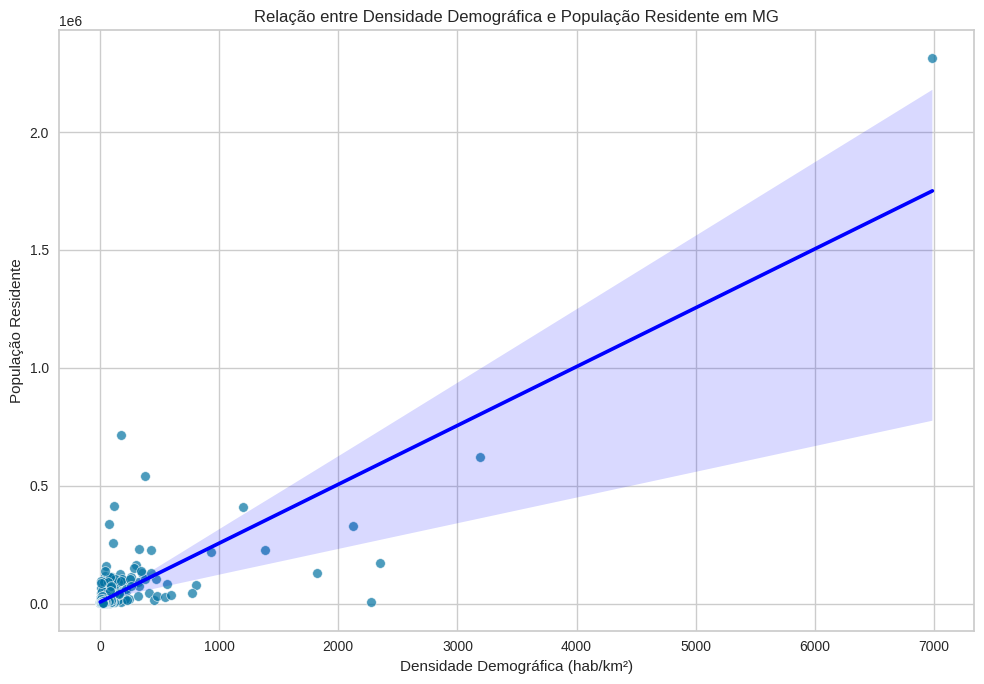

In [30]:
# Calcular a densidade demográfica (habitantes por km²)
df2['Densidade_Demografica'] = df2['Populacao_residente'] / df2['Área_Territorial']

# Criar a figura e os eixos
plt.figure(figsize=(10, 7))

# Plotar o gráfico de dispersão com Seaborn
sns.scatterplot(x='Densidade_Demografica', y='Populacao_residente', data=df2, alpha=0.7)
sns.regplot(x='Densidade_Demografica', y='Populacao_residente', data=df2, scatter=False, color='blue')

# Configurar títulos e rótulos dos eixos
plt.title('Relação entre Densidade Demográfica e População Residente em MG')
plt.xlabel('Densidade Demográfica (hab/km²)')
plt.ylabel('População Residente')

# Exibir a plotagem
plt.tight_layout()
plt.show()

#Dados para construção piramide etária da população de Minas Gerais no ano de  2010
#Fonte: https://sidra.ibge.gov.br/tabela/7358

In [31]:
#Carregamento e leitura da tabela 7358, desconsiderando as 6 primeiras e a ultima linha.
df3 = pd.read_excel('/content/drive/MyDrive/FIA LABDATA/ANALYTICS/Dataset/TCC/tabela7358.xlsx', skiprows=6, skipfooter=1)
df3.head()

,Unnamed: 0,Homens,Mulheres
0,0 a 4 anos,684629,653924
1,5 a 9 anos,765070,732722
2,10 a 14 anos,869775,841335
3,15 a 19 anos,879822,862826
4,20 a 24 anos,885987,871071


In [32]:
#Renomear colunas
df3.columns = ['Idade', 'Masculino', 'Feminino']
df3.head()

,Idade,Masculino,Feminino
0,0 a 4 anos,684629,653924
1,5 a 9 anos,765070,732722
2,10 a 14 anos,869775,841335
3,15 a 19 anos,879822,862826
4,20 a 24 anos,885987,871071


In [33]:
#Calculo para obtenção da população total (masculino e feminino)
df3.columns = ['Idade', 'M', 'F']
df3.loc['Total']= df3.sum()
#Nomeando a última linha de Total
df3.loc[df3.index[-1], 'Idade' ] = 'Total'
df3

,Idade,M,F
0,0 a 4 anos,684629,653924
1,5 a 9 anos,765070,732722
2,10 a 14 anos,869775,841335
3,15 a 19 anos,879822,862826
4,20 a 24 anos,885987,871071
5,25 a 29 anos,863163,864704
6,30 a 34 anos,800971,816400
7,35 a 39 anos,703780,731932
8,40 a 44 anos,680872,711583
9,45 a 49 anos,636735,675448


In [34]:
#Total Geral
total_geral = df3.loc[df3.index[-1], 'F'] + df3.loc[df3.index[-1], 'M']
total_geral

19957444

In [35]:
#Remoção da  linha de Total
df3 = df3.drop('Total', axis=0)
df3

,Idade,M,F
0,0 a 4 anos,684629,653924
1,5 a 9 anos,765070,732722
2,10 a 14 anos,869775,841335
3,15 a 19 anos,879822,862826
4,20 a 24 anos,885987,871071
5,25 a 29 anos,863163,864704
6,30 a 34 anos,800971,816400
7,35 a 39 anos,703780,731932
8,40 a 44 anos,680872,711583
9,45 a 49 anos,636735,675448


In [36]:
#Conversão dos  valores para  porcentagens do Total
df3['M'] = df3['M'] / total_geral * -100
df3['F'] = df3['F'] / total_geral * 100

In [37]:
df3

,Idade,M,F
0,0 a 4 anos,-3.430444,3.276592
1,5 a 9 anos,-3.833507,3.671422
2,10 a 14 anos,-4.358148,4.215645
3,15 a 19 anos,-4.408490,4.323329
4,20 a 24 anos,-4.439381,4.364642
5,25 a 29 anos,-4.325018,4.332739
6,30 a 34 anos,-4.013395,4.090704
7,35 a 39 anos,-3.526403,3.667464
8,40 a 44 anos,-3.411619,3.565502
9,45 a 49 anos,-3.190464,3.384441


In [38]:
#Invertendo a ordem das idades
Idades = [
 '80 anos ou mais',
 '75 a 79 anos',
 '70 a 74 anos',
 '65 a 69 anos',
 '60 a 64 anos',
 '55 a 59 anos',
 '50 a 54 anos',
 '45 a 49 anos',
 '40 a 44 anos',
 '35 a 39 anos',
 '30 a 34 anos',
 '25 a 29 anos',
 '20 a 24 anos',
 '15 a 19 anos',
 '10 a 14 anos',
 '5 a 9 anos',
 '0 a 4 anos']

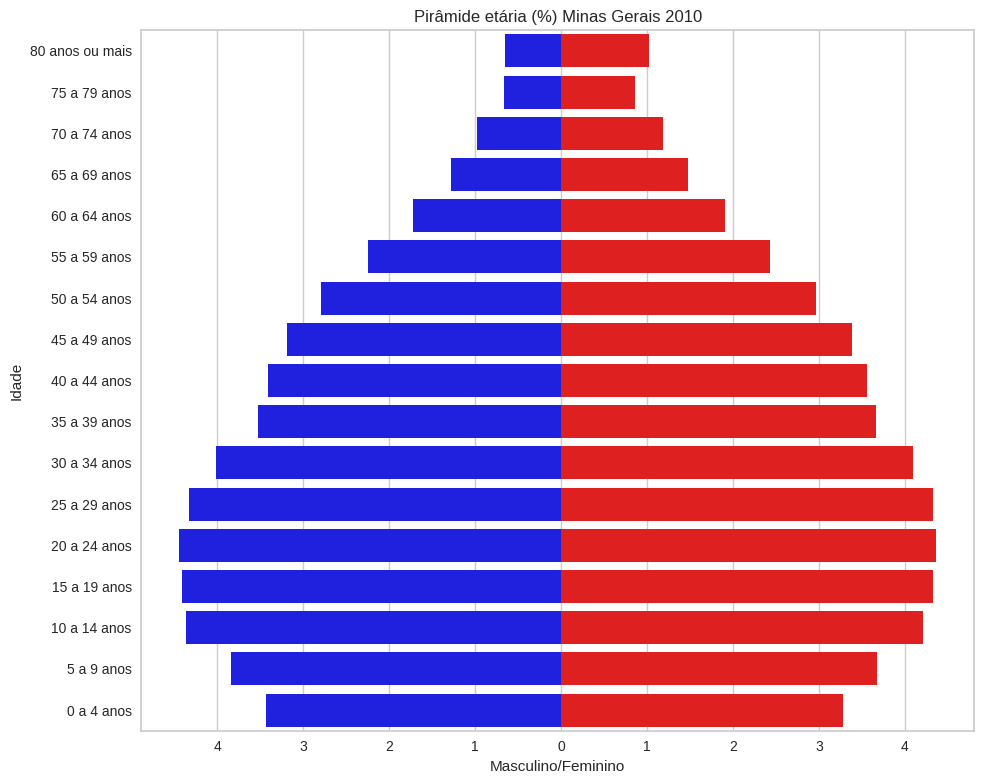

In [39]:
#Estrutura da Pirâmide Etária
fig, ax = plt.subplots(figsize=(10,8))

ax1 = sns.barplot(x='M', y='Idade', data=df3, order=Idades, color='blue')
ax2 = sns.barplot(x='F', y='Idade', data=df3, order=Idades, color='red')

plt.title('Pirâmide etária (%) Minas Gerais 2010')
plt.xlabel('Masculino/Feminino')

plt.xticks(ticks=[-4, -3, -2, -1, 0, 1, 2, 3, 4],
labels=['4', '3', '2', '1', '0', '1', '2', '3', '4']);


plt.tight_layout()
plt.show()

A pirâmide etária apresentada mostra a distribuição percentual da população de Minas Gerais em 2010, dividida por faixas etárias e por sexo (masculino e feminino).

A pirâmide tem uma base larga que vai se afunilando à medida que as faixas etárias aumentam, indicando uma maior concentração de população nas faixas etárias mais jovens e uma diminuição gradual conforme a idade avança.

Em geral, as proporções de homens e mulheres são bastante semelhantes na maioria das faixas etárias, mas observa-se uma ligeira predominância feminina nas faixas etárias mais avançadas (acima de 60 anos).
As faixas etárias de 0 a 4 anos até 20 a 24 anos são as mais representativas, mostrando que a população jovem era uma parcela significativa da população total em 2010.

A parte superior da pirâmide (faixas etárias a partir de 60 anos) é mais estreita, refletindo uma menor proporção de idosos na população, com uma leve maior participação feminina.

Essa pirâmide etária é característica de uma população em transição, com uma base jovem ainda ampla, mas já mostrando sinais de envelhecimento com uma população idosa crescente.

#Desenvolvendo Dendrograma para correlação do municípios com similaridade de renda per capita.

In [40]:
#Filtrando as colunas que serão utilizadas
df_dendrograma2 = df1.filter(regex='Município|Renda_per_capita')

In [41]:
#Filtrando os 15 municípios com maior renda per capita
df_dendrograma2 = df_dendrograma2.sort_values(by='Renda_per_capita', ascending=False).head(15)

In [42]:
df_dendrograma2

,Município,Renda_per_capita
519,Nova Lima,1731.84
65,Belo Horizonte,1497.29
421,Juruaia,1122.10
430,Lagoa Santa,1089.96
419,Juiz de Fora,1050.88
405,Jequitibá,1007.03
823,Uberlândia,1001.45
822,Uberaba,978.01
170,Caxambu,963.25
604,Poços de Caldas,953.96


In [43]:
#Criando indices
df_dendrograma2 = df_dendrograma2.set_index('Município')

In [44]:
df_dendrograma2.index

CategoricalIndex(['Nova Lima', 'Belo Horizonte', 'Juruaia', 'Lagoa Santa',
                  'Juiz de Fora', 'Jequitibá', 'Uberlândia', 'Uberaba',
                  'Caxambu', 'Poços de Caldas', 'Itajubá', 'Itaú de Minas',
                  'Brumadinho', 'Varginha', 'Tapira'],
                 categories=['Abadia dos Dourados', 'Abaeté', 'Abre Campo', 'Acaiaca', ..., 'Água Boa', 'Água Comprida', 'Águas Formosas', 'Águas Vermelhas'], ordered=False, dtype='category', name='Município')

In [45]:
#Importando biblioteca
from scipy.cluster.hierarchy import dendrogram, linkage

In [46]:
#Criando Label 'Rótulo'
label_list = df_dendrograma2.index

In [47]:
label_list

CategoricalIndex(['Nova Lima', 'Belo Horizonte', 'Juruaia', 'Lagoa Santa',
                  'Juiz de Fora', 'Jequitibá', 'Uberlândia', 'Uberaba',
                  'Caxambu', 'Poços de Caldas', 'Itajubá', 'Itaú de Minas',
                  'Brumadinho', 'Varginha', 'Tapira'],
                 categories=['Abadia dos Dourados', 'Abaeté', 'Abre Campo', 'Acaiaca', ..., 'Água Boa', 'Água Comprida', 'Águas Formosas', 'Águas Vermelhas'], ordered=False, dtype='category', name='Município')

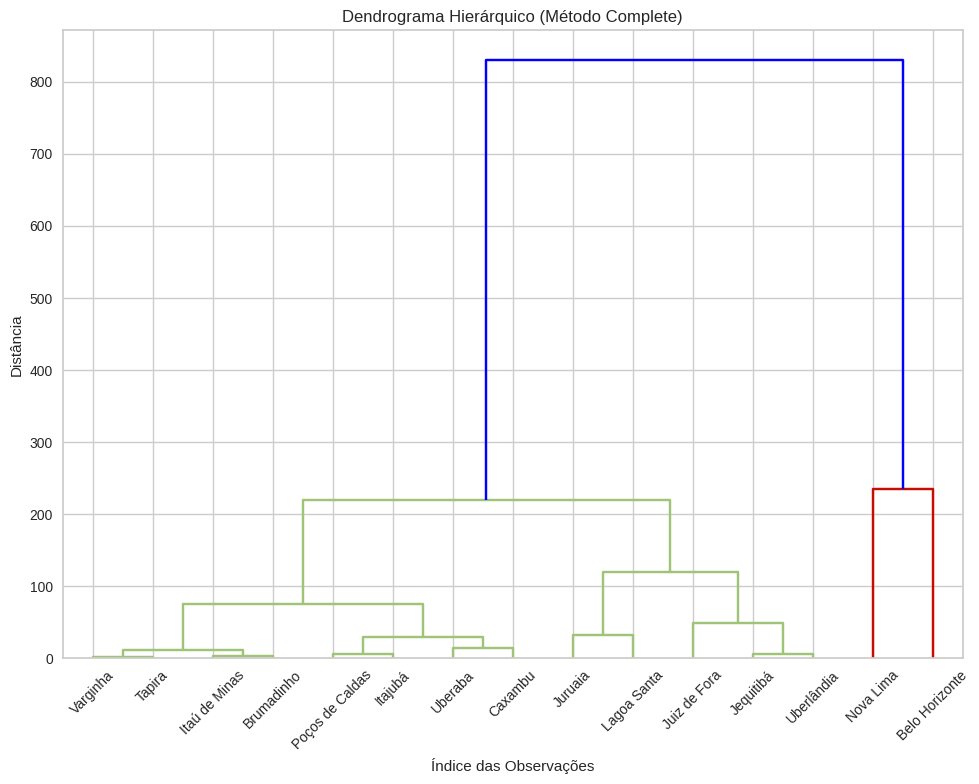

In [48]:
#Plotando Dendrograma com os 15 municípios com maior renda per capita
plt.figure(figsize=(10,8))
# Controle a densidade do dendrograma
metodo_complete = linkage(df_dendrograma2, 'complete')
dendrogram(metodo_complete,
           labels=label_list,
           leaf_rotation=45,
           leaf_font_size=10,
           orientation='top',
           truncate_mode='lastp',
           p=30,
           show_contracted=True,
           above_threshold_color='blue'
           )

plt.title('Dendrograma Hierárquico (Método Complete)')
plt.xlabel('Índice das Observações')
plt.ylabel('Distância')
plt.tight_layout()

In [49]:
from scipy.cluster.hierarchy import fcluster

In [50]:
corte = 800
clusters = fcluster(metodo_complete, corte, criterion='distance')

In [51]:
clusters

array([2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [52]:
#Adicionando uma coluna (cluster_id) ao df_dendrograma
df_dendrograma2['cluster_id']= clusters

In [53]:
#Apresentando o df com a coluna adicionada
df_dendrograma2.head(15)

,Renda_per_capita,cluster_id
Município,,
Nova Lima,1731.84,2
Belo Horizonte,1497.29,2
Juruaia,1122.10,1
Lagoa Santa,1089.96,1
Juiz de Fora,1050.88,1
Jequitibá,1007.03,1
Uberlândia,1001.45,1
Uberaba,978.01,1
Caxambu,963.25,1


In [55]:
#Filtrando os municípios relacionados aos clusters e apresentando as respectivas renda per capita
df_dendrograma2[df_dendrograma2['cluster_id']==1]

,Renda_per_capita,cluster_id
Município,,
Juruaia,1122.10,1
Lagoa Santa,1089.96,1
Juiz de Fora,1050.88,1
Jequitibá,1007.03,1
Uberlândia,1001.45,1
Uberaba,978.01,1
Caxambu,963.25,1
Poços de Caldas,953.96,1
Itajubá,948.20,1


##Segmentando os clusters

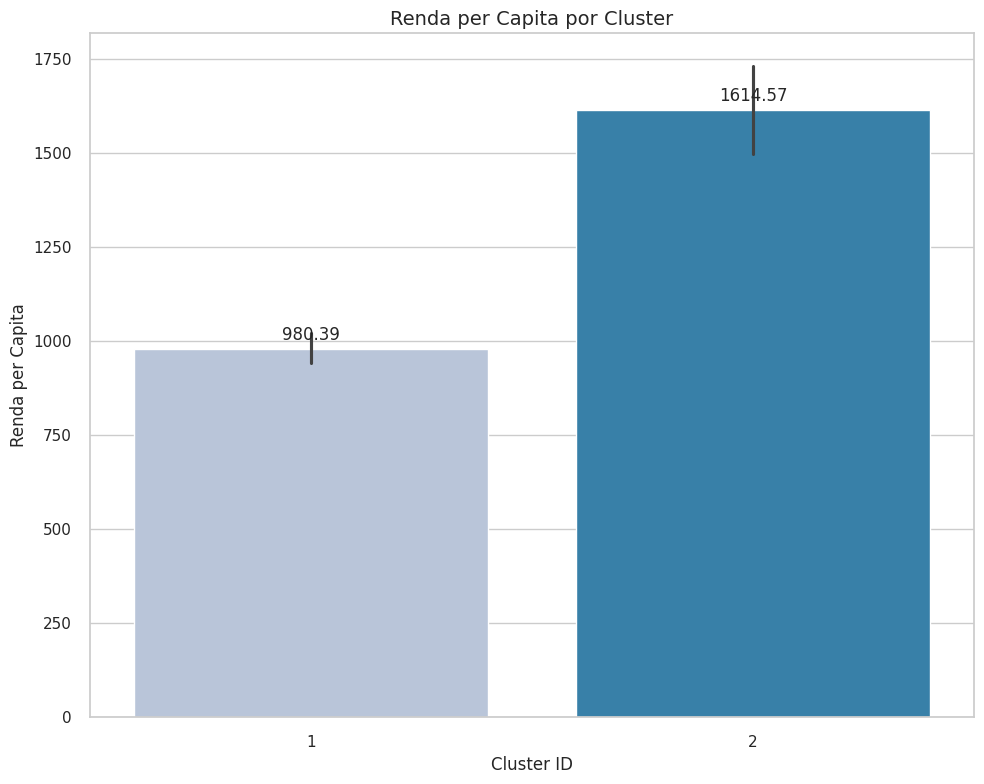

In [54]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))

df_ordenado = df_dendrograma2.sort_values('Renda_per_capita', ascending=False)
ax = sns.barplot(x='cluster_id', y='Renda_per_capita', data=df_ordenado, palette='PuBu')

plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Renda per Capita', fontsize=12)
plt.title('Renda per Capita por Cluster', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha ='center', va ='center', xytext = (0, 10), textcoords = 'offset points')

plt.xticks(rotation=0)
plt.tight_layout();

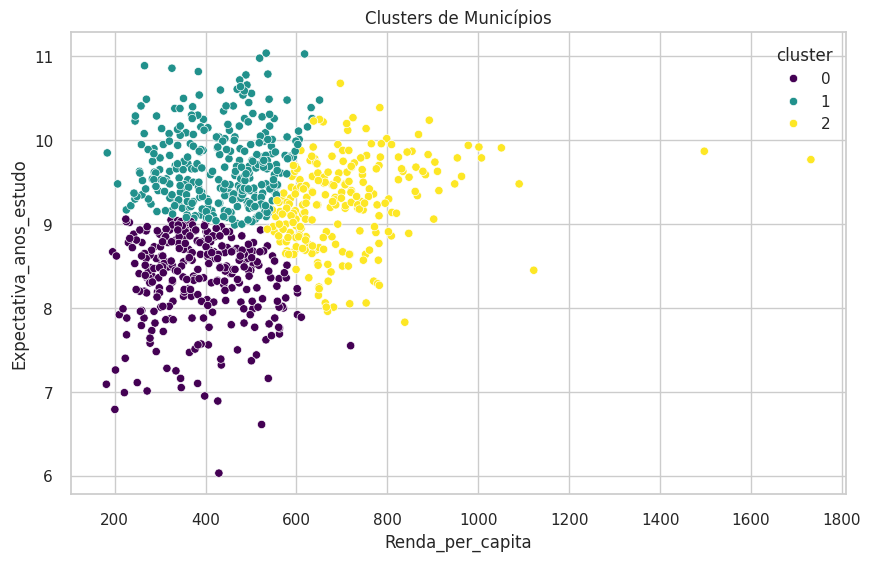

In [56]:
# Seleção das features
X = df1[['Renda_per_capita', 'Expectativa_anos_estudo']]

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicação do K-means (k = 3, por exemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
df1['cluster'] = kmeans.fit_predict(X_scaled)

# Visualização dos clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Renda_per_capita', y='Expectativa_anos_estudo', hue='cluster', data=df1, palette='viridis')
plt.title('Clusters de Municípios')
plt.show()

##Criando ABT (ANALYTICS BASE TABLE), para treinamento de modelos de classificação.

In [57]:
# Calcular os quartis do IDHM
quartis_idh = df1['IDHM'].quantile([0.25, 0.5, 0.75])

# Criar a coluna 'Categoria_IDH'
def categorizar_idh(idh):
  if idh <= quartis_idh[0.25]:
    return 'Baixo'
  elif idh <= quartis_idh[0.75]:
    return 'Médio'
  else:
    return 'Alto'

df1['Categoria_IDH'] = df1['IDHM'].apply(categorizar_idh)

# Codificar a coluna 'Municipio'
le = LabelEncoder()
df1['Municipio_encoded'] = le.fit_transform(df1['Município'])

# Criar o DataFrame 'abt'
abt = df1[['Município', 'Municipio_encoded', 'Renda_per_capita', 'Expectativa_anos_estudo', 'IDHM', 'Categoria_IDH']]

# Exibir as 5 primeiras linhas do DataFrame 'abt'
print(abt.head().to_markdown(index=False, numalign="left", stralign="left"))

| Município           | Municipio_encoded   | Renda_per_capita   | Expectativa_anos_estudo   | IDHM   | Categoria_IDH   |
|:--------------------|:--------------------|:-------------------|:--------------------------|:-------|:----------------|
| Abadia dos Dourados | 0                   | 596.18             | 8.68                      | 0.689  | Médio           |
| Abaeté              | 1                   | 707.24             | 9.19                      | 0.698  | Médio           |
| Abre Campo          | 2                   | 444.32             | 9.34                      | 0.654  | Médio           |
| Acaiaca             | 3                   | 357.03             | 10.09                     | 0.63   | Baixo           |
| Açucena             | 48                  | 325.42             | 8.49                      | 0.61   | Baixo           |


In [58]:
abt

,Município,Municipio_encoded,Renda_per_capita,Expectativa_anos_estudo,IDHM,Categoria_IDH
0,Abadia dos Dourados,0,596.18,8.68,0.689,Médio
1,Abaeté,1,707.24,9.19,0.698,Médio
2,Abre Campo,2,444.32,9.34,0.654,Médio
3,Acaiaca,3,357.03,10.09,0.630,Baixo
4,Açucena,48,325.42,8.49,0.610,Baixo
...,...,...,...,...,...,...
848,Virginópolis,841,423.01,9.04,0.675,Médio
849,Virgolândia,842,339.03,8.93,0.620,Baixo
850,Visconde do Rio Branco,844,658.96,8.84,0.709,Alto
851,Volta Grande,846,515.46,8.01,0.669,Médio


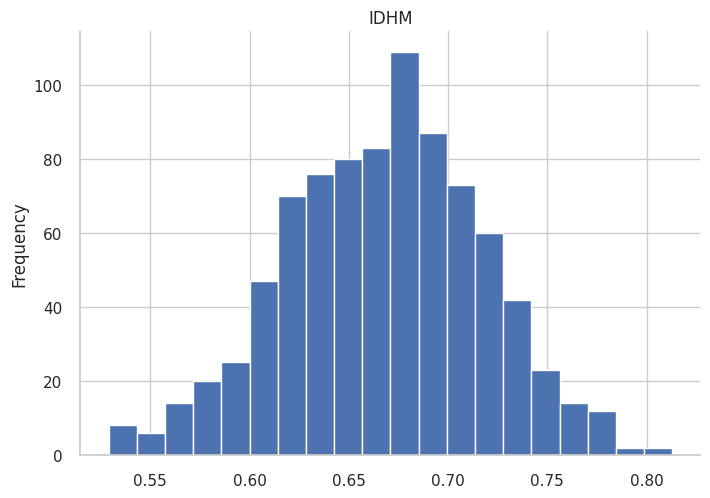

In [59]:
from matplotlib import pyplot as plt
abt['IDHM'].plot(kind='hist', bins=20, title='IDHM')
plt.gca().spines[['top', 'right',]].set_visible(False)

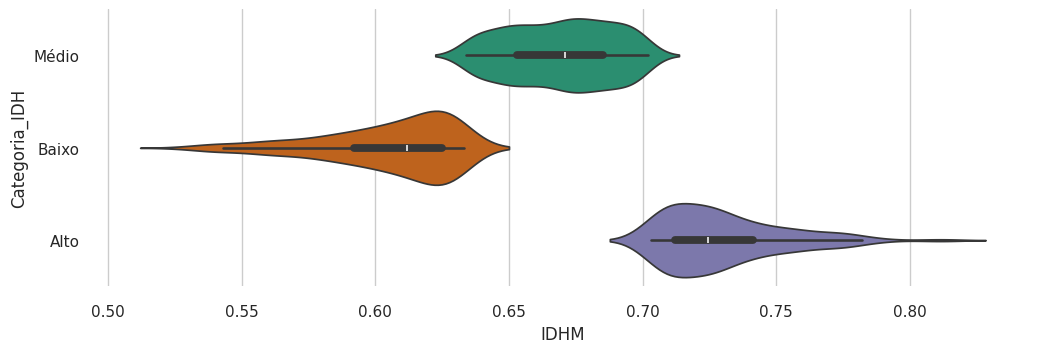

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(abt['Categoria_IDH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(abt, x='IDHM', y='Categoria_IDH', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

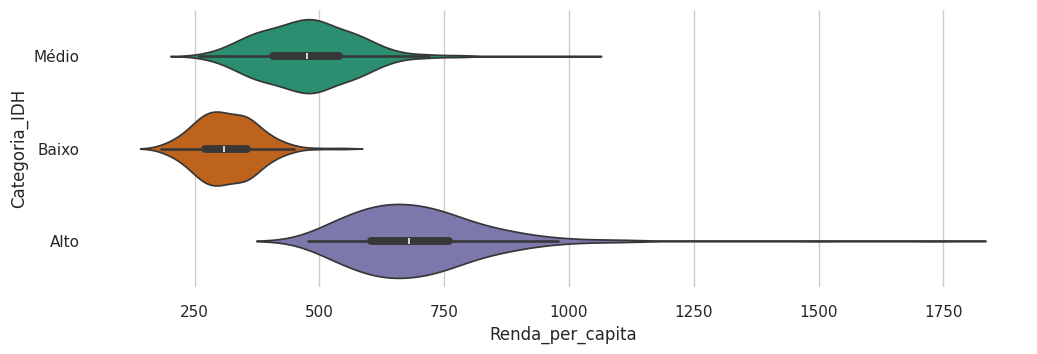

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(abt['Categoria_IDH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(abt, x='Renda_per_capita', y='Categoria_IDH', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

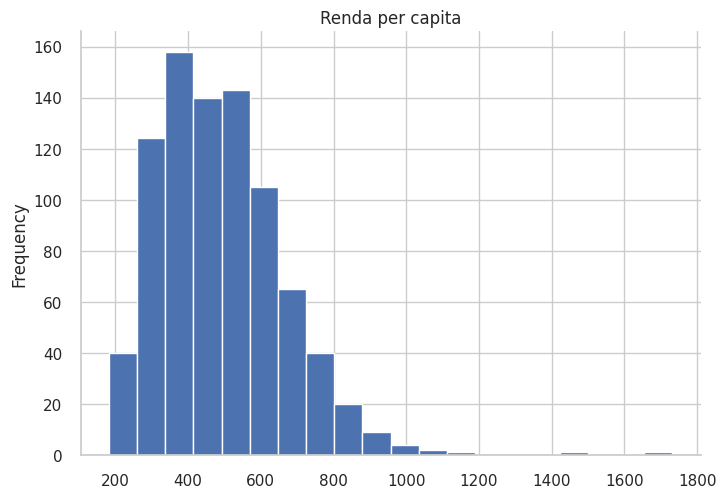

In [62]:
abt['Renda_per_capita'].plot(kind='hist', bins=20, title='Renda per capita')
plt.gca().spines[['top', 'right',]].set_visible(False)

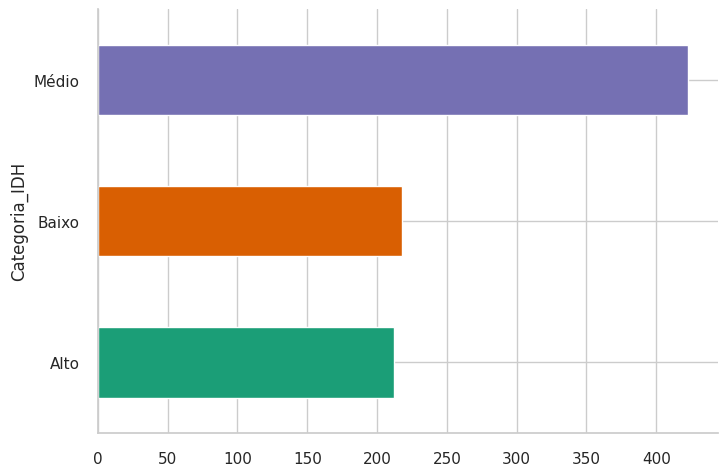

In [63]:
abt.groupby('Categoria_IDH',).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


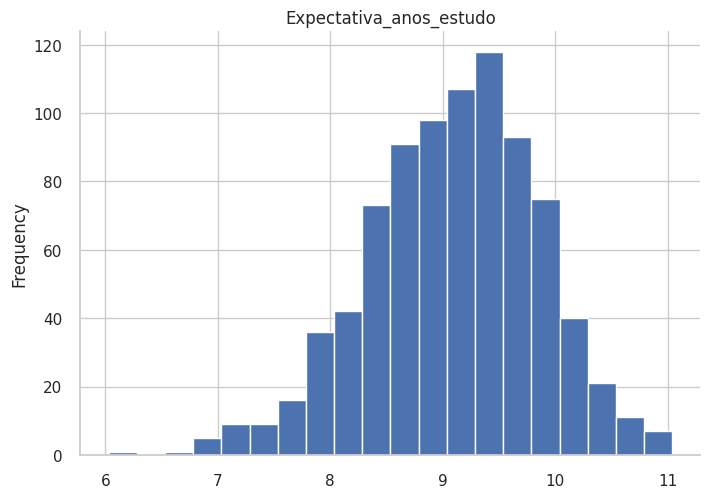

In [64]:
abt['Expectativa_anos_estudo'].plot(kind='hist', bins=20, title='Expectativa_anos_estudo')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Criando modelo de classificação

In [65]:
# Variáveis preditoras (características que serão usadas para fazer a previsão)
X = abt[['Municipio_encoded', 'Renda_per_capita', 'Expectativa_anos_estudo']]

# Variável alvo (o que queremos prever)
y = abt['Categoria_IDH']

In [66]:
# 70% dos dados para treino, 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# Criando o modelo
modelo = DecisionTreeClassifier()

# Treinando o modelo com os dados de treino
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
# Fazendo previsões com os dados de teste
y_pred = modelo.predict(X_test)

# Avaliando a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acuracia}')

Acurácia do modelo: 0.71875


##Modelo de classificação utilizando o Pycaret

In [69]:
df1['Nivel_IDHM'] = pd.cut(df1['IDHM'], bins=[0, 0.55, 0.7, 0.8, 1],
                           labels=['Baixo', 'Médio', 'Alto', 'Muito Alto'])

# Configurar o ambiente PyCaret
clf1 = setup(data = df1,
             target = 'Nivel_IDHM',
             ignore_features = ['Estado'],  # Ignorar colunas não relevantes
             session_id=123)

# Comparar modelos
best_model = compare_models()
if best_model:
# Criar o modelo
  model = create_model(best_model)

# Ajustar o modelo
  tuned_model = tune_model(model)

# Avaliar o modelo
  predictions = predict_model(tuned_model)

# Finalizar o modelo
  final_model = finalize_model(tuned_model)

# Salvar o modelo
  save_model(final_model,'modelo_classificacao_IDHM')
else:
    print("Nenhum modelo adequado encontrado.")

,Description,Value
0,Session id,123
1,Target,Nivel_IDHM
2,Target type,Multiclass
3,Target mapping,"Alto: 0, Baixo: 1, Muito Alto: 2, Médio: 3"
4,Original data shape,"(853, 14)"
5,Transformed data shape,"(853, 15)"
6,Transformed train set shape,"(597, 15)"
7,Transformed test set shape,"(256, 15)"
8,Ignore features,1
9,Numeric features,10


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Nenhum modelo adequado encontrado.


##Modelo de Rede Neural

In [70]:
le = LabelEncoder()
df1_numeric['Município'] = le.fit_transform(df['Município'])
#Selecionando features e target
X = df1_numeric.drop('IDHM', axis=1)  # Features
y = df1_numeric['IDHM']               # Target
#Divisão de modelo treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Construindo modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
#Calculando o numero de classes 'Nivel_IDHM'
num_classes = df1['Nivel_IDHM'].nunique()
model.add(Dense(num_classes, activation='softmax'))

#Compilando modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train shape: (682, 8)
y_train shape: (682,)
X_test shape: (171, 8)
y_test shape: (171,)


In [71]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

#Treinando o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.3026 - loss: 1.3569 - val_accuracy: 0.9883 - val_loss: 0.7175
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9899 - loss: 0.5989 - val_accuracy: 1.0000 - val_loss: 0.2467
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.1940 - val_accuracy: 1.0000 - val_loss: 0.0694
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0630 - val_accuracy: 1.0000 - val_loss: 0.0280
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0271 - val_accuracy: 1.0000 - val_loss: 0.0158
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0151 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0105 - val_accuracy: 1.0000 - val_loss: 0.0076
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss

In [72]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.3964e-04 
Loss: 0.00014470941096078604, Accuracy: 1.0
